# CS422 - Homework 2 

## By: Laura Pereda

### Recitation Problems - Chapter 3

#### Exercise #2 - Utilize Table 3.5 
a. Compute the Gini index for overall collection of training examples
    
Gini = 1 - $ $$\left(\frac{5}{10}\right)$$^2 $ - $ $$\left(\frac{5}{10}\right)$$^2 $ = **0.5**

b. Compute the Gini index for the __Customer ID__ attribute

Since Customer ID is a unique attribute, the split would result in one node per leaf. This will lead to a Gini of 0 for each Customer ID, which means the overall would also be 0.

c. Compute the Gini index for the __Gender__ attribute: __Male__ and __Female__

Males - Total Males: 6 in Class 0 & 4 in Class 1. *Gini = 1 - $ $$\left(\frac{6}{10}\right)$$^2 $ - $ $$\left(\frac{4}{10}\right)$$^2 $ = 0.48*

Female - Total Females: 4 in Class 0 & 6 in Class 1. *Gini = 1 - $ $$\left(\frac{4}{10}\right)$$^2 $ - $ $$\left(\frac{6}{10}\right)$$^2 $ = 0.48*

**Weighted Gini = ($\frac{10}{20}$) * (0.48) + ($\frac{10}{20}$) * (0.48) = 0.48**

d. Compute the Gini index for the __Car Type__ attribute. There are three car types: __Family__, __Sports__, and __Luxury__. 

Family: 1 in Class 0 & 3 in Class 1. *Gini = 1 - $ $$\left(\frac{1}{4}\right)$$^2 $ - $ $$\left(\frac{3}{4}\right)$$^2 $ = 0.375*

Sports: 8 in Class 0 & 0 in Class 1. *Gini = 1 - $ $$\left(\frac{8}{8}\right)$$^2 $ - 0 = 0*

Luxury: 1 in Class 0 & 7 in Class 1. *Gini = 1 - $ $$\left(\frac{1}{8}\right)$$^2 $ - $ $$\left(\frac{7}{8}\right)$$^2 $ = 0.21875*

**Weighted Gini = ($\frac{4}{20}$) * (0.375) + ($\frac{8}{20}$) * (0) + ($\frac{8}{20}$) * (0.21875) = 0.1625**

e. Compute the Gini index for the __Shirt Size__ attribute using multiway split. There are 4 types: **Small**, **Medium**, **Large**, and **Extra Large**.

Small: 3 in Class 0 & 2 in Class 1. *Gini = 1 - $ $$\left(\frac{3}{5}\right)$$^2 $ - $ $$\left(\frac{2}{5}\right)$$^2 $ = 0.48*

Medium: 3 in Class 0 & 4 in Class 1. *Gini = 1 - $ $$\left(\frac{3}{7}\right)$$^2 $ - $ $$\left(\frac{4}{7}\right)$$^2 $ = 0.49*

Large: 2 in Class 0 & 2 in Class 1. *Gini = 1 - $ $$\left(\frac{2}{4}\right)$$^2 $ - $ $$\left(\frac{2}{4}\right)$$^2 $ = 0.5*

XLarge: 2 in Class 0 & 2 in Class 1. *Gini = 1 - $ $$\left(\frac{2}{4}\right)$$^2 $ - $ $$\left(\frac{2}{4}\right)$$^2 $ = 0.5*

**Weighted Gini = ($\frac{5}{20}$) * (0.48) + (($\frac{7}{20}$) * (0.49) + ($\frac{4}{20}$) * (0.5) + ($\frac{4}{20}$) * (0.5) = 0.4915**

f. Which attribute is better?

The best attribute is __Car Type__ because it produced the lowest weighted avg Gini index.

g. Why shouldn't the __Customer ID__ be used as attribute test condition even though it computed the lowest Gini?

Impurity alone is not enough to determine a good attribute test condition. The __Customer ID__ attribute is a unique attribute for each instance. Even if we train using the current __Customer IDs__, these will be insufficient when it comes to testing against new ones. Thus, __Customer ID__ is not a good attribute test condition.

#### Exercise 3 - Use Table 3.6 for Binary Classification

a. What is the entropy for collection of training examples with respect to class attribute?

Entropy = -($\frac{4}{9}$)log($\frac{4}{9}$) - ($\frac{5}{9}$)log($\frac{5}{9}$) = **0.9911**

b. Information gains of $a_1$ & $a_2$ relative to these training examples?

| $a_1$ |  + |   | - |   |
|---|---|---|---|---|
| T  | 3  |   | 1  |   |
|   |   |   |   |   |
| F  | 1  |   | 4  |   |

E ($a_1$) = ($\frac{4}{9}$) [-($\frac{3}{4}$)log($\frac{3}{4}$) - ($\frac{1}{4}$)log($\frac{1}{4}$)] + ($\frac{5}{9}$) [-($\frac{1}{5}$)log($\frac{1}{5}$) - ($\frac{4}{5}$)log($\frac{1}{5}$)] = 0.7616

Thus, the information gain for $a_1$ is 0.9911 - 0.7616 = **0.2294**

| $a_2$ |  + |   | - |   |
|---|---|---|---|---|
| T  | 2  |   | 3  |   |
|   |   |   |   |   |
| F  | 2  |   | 2  |   |

E ($a_2$) = ($\frac{5}{9}$) [-($\frac{2}{5}$)log($\frac{2}{5}$) - ($\frac{3}{5}$)log($\frac{3}{5}$)] + ($\frac{4}{9}$) [-($\frac{2}{4}$)log($\frac{2}{4}$) - ($\frac{2}{4}$)log($\frac{2}{4}$)] = *0.9839*

Thus, the information gain for $a_2$ is 0.9911 - 0.9839 = **0.0072**

c. For $a_3$, compute the information gain for every possible split. Since it's a continous variable, the **median** will be used to determine the split point.

| Split  | 2.0  |   | 3.5  |   | 4.5  |   | 5.5  |   | 6.5  |   | 7.5  |  |
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|   |  <= | >  | <=  | >  | <=  | >  | <=  | >  | <=  | >  | <=  | >  |
| +  | 1  | 3  | 1  | 3  | 2  | 2  | 2  | 2  | 3  | 1  | 4  | 0  |
| _  | 0  | 5  | 1  | 4  | 1  | 4  | 3  | 2  | 3  | 2  | 4  | 1  |

E(<= 2.0) = -($\frac{1}{1}$) * log($\frac{1}{1}$) - (0) * log(0) = 0

E( > 2.0) = -($\frac{3}{8}$) * log($\frac{3}{8}$) - ($\frac{5}{8}$) * log($\frac{5}{8}$) = 0.9544

Avg = [($\frac{1}{9}$) * (0) + ($\frac{8}{9}$) * 0.9544)] = 0.8483

Gain: 0.9911 - 0.8483 = **0.1427**

--------------------------------------

E(<= 3.5) = -($\frac{1}{2}$) * log($\frac{1}{2}$) - ($\frac{1}{2}$) * log($\frac{1}{2}$) = 1

E( > 3.5) = -($\frac{3}{7}$) * log($\frac{3}{7}$) - ($\frac{4}{7}$) * log($\frac{4}{7}$) = 0.9852

Avg = [($\frac{2}{9}$) * (1) + ($\frac{7}{9}$) * (0.9852)] = 0.9884

Gain = 0.9911 - 0.9884 = **0.0026**

-------------------------------------
E(<= 4.5) = -($\frac{2}{3}$) * log($\frac{2}{3}$) - ($\frac{1}{3}$) * log($\frac{1}{3}$) = 0.91829

E( > 4.5) = -($\frac{2}{6}$) * log($\frac{2}{6}$) - ($\frac{4}{6}$) * log($\frac{4}{6}$) = 0.91829

Avg = [($\frac{3}{9}$) * (0.91829) + ($\frac{6}{9}$) * (0.91829)] = 0.91829

Gain = 0.9911 - 0.91829 = **0.07281**

------------------------------------
E(<= 5.5) = -($\frac{2}{5}$) * log($\frac{2}{5}$) - ($\frac{3}{5}$) * log($\frac{3}{5}$) = 0.97095

E( > 5.5) = -($\frac{2}{4}$) * log($\frac{2}{4}$) - ($\frac{2}{4}$) * log($\frac{2}{4}$) = 1

Avg = [($\frac{5}{9}$) * (0.97095) + ($\frac{4}{9}$) * (1)] = 0.98386

Gain = 0.9911 - 0.98386 = **0.00723**

--------------------------------------
E(<= 6.5) = -($\frac{3}{6}$) * log($\frac{3}{6}$) - ($\frac{3}{6}$) * log($\frac{3}{6}$) = 1

E( > 6.5) = -($\frac{1}{3}$) * log($\frac{1}{3}$) - ($\frac{2}{3}$) * log($\frac{2}{3}$) = 0.91829

Avg = [($\frac{6}{9}$) * (1) + ($\frac{3}{9}$) * (0.91829)] = 0.97276

Gain = 0.9911 - 0.97276 = **0.01833**

--------------------------------------
E(<= 7.5) = -($\frac{4}{8}$) * log($\frac{4}{8}$) - ($\frac{4}{8}$) * log($\frac{4}{8}$) = 1

E( > 7.5) = -(0) * log(0) - ($\frac{1}{1}$) * log($\frac{1}{1}$) = 0

Avg = [($\frac{8}{9}$) * (1) + ($\frac{1}{9}$) * (0)] = 0.8888

Gain = 0.9911 - 0.8888 = **0.10221**

d. What is the best split among all 3?

$a_1$ has the highest information gain of **0.2294**, so it is the best split.

e. What is the best split among $a_1$ and $a_2$ according to the classification error rate?

For $a_1$: ($\frac{2}{9}$)

For $a_2$: ($\frac{4}{9}$)

Thus, since $a_1$ has the smaller error rate it is the best split.

f. What is the best split among $a_1$ and $a_2$ according to the Gini index?

Gini for $a_1$ = ($\frac{4}{9}$)[1 - $ $$\left(\frac{3}{4}\right)$$^2 $ - $ $$\left(\frac{1}{4}\right)$$^2 $] + ($\frac{5}{9}$)[1 - $ $$\left(\frac{1}{5}\right)$$^2 $ - $ $$\left(\frac{4}{5}\right)$$^2 $] = 0.3444

Gini for $a_2$ = ($\frac{5}{9}$)[1 - $ $$\left(\frac{2}{5}\right)$$^2 $ - $ $$\left(\frac{3}{5}\right)$$^2 $] + ($\frac{4}{9}$)[1 - $ $$\left(\frac{2}{4}\right)$$^2 $ - $ $$\left(\frac{2}{4}\right)$$^2 $] = 0.4889

Since $a_1$ has the smaller gini index, it produces the better split.

#### Exercise 5 - Use the Table on pg. 187 for a binary class problem

a. Calculate the information gain when splitting on A and B. Which attribute would the decision tree induction choose?

Entropy (before) = -($\frac{4}{10}$) * log($\frac{4}{10}$) - ($\frac{6}{10}$) * log($\frac{6}{10}$) = 0.9710

|  |  A = T |   | A = F |   |
|---|---|---|---|---|
| +  | 4 |   | 0  |   |
|   |   |   |   |   |
| -  | 3  |   | 3  |   |

Entropy (A = T) = -($\frac{4}{7}$) * log($\frac{4}{7}$) - ($\frac{3}{7}$) * log($\frac{3}{7}$) = 0.9852

Entropy (A = F) = -(0) * log(0) - ($\frac{3}{3}$) * log($\frac{3}{3}$) = 0

Avg = [($\frac{7}{10}$) * (0.9852) + ($\frac{3}{10}$) * (0)] = 0.68964

Gain = 0.9710 - 0.68964 = 0.28136

------------------------------------------
|  |  B = T |   | B = F |   |
|---|---|---|---|---|
| +  | 3 |   | 1  |   |
|   |   |   |   |   |
| -  | 1  |   | 5  |   |

Entropy (B = T) = -($\frac{3}{4}$) * log($\frac{3}{4}$) - ($\frac{1}{4}$) * log($\frac{1}{4}$) = 0.8113

Entropy (B = F) = -($\frac{1}{6}$) * log($\frac{1}{6}$) - ($\frac{5}{6}$) * log($\frac{5}{6}$) = 0.6500

Avg = [($\frac{4}{10}$) * (0.8113) + ($\frac{6}{10}$) * (0.6500)] = 0.7145

Gain = 0.9710 - 0.7145 = 0.2564

The attribute A will be chosen to split the node since it has a higher gain.

b. Calculate the Gini index when splitting on A & B. Which attribute will be chosen?

Gini (Before) = 1 - $ $$\left(\frac{4}{10}\right)$$^2 $ - $ $$\left(\frac{6}{10}\right)$$^2 $ = 0.48

Gini (A = T) = 1 - $ $$\left(\frac{4}{7}\right)$$^2 $ - $ $$\left(\frac{3}{7}\right)$$^2 $ = 0.4898

Gini (A = F) = 1 - 0 - $ $$\left(\frac{3}{3}\right)$$^2 $ = 0

Avg. = [($\frac{7}{10}$) * (0.4898) + ($\frac{3}{10}$) * (0)] = 0.3428

Gain = 0.48 - 0.3428 = 0.1371

Gini (B = T) = 1 - $ $$\left(\frac{3}{4}\right)$$^2 $ - $ $$\left(\frac{1}{4}\right)$$^2 $ = 0.3750

Gini (B = F) = 1 - $ $$\left(\frac{1}{6}\right)$$^2 $ - $ $$\left(\frac{5}{6}\right)$$^2 $ = 0.2778

Avg. = [($\frac{4}{10}$) * (0.3750) + ($\frac{6}{10}$) * (0.2778)] = 0.31668

Gain = 0.48 - 0.31668 = 0.16332

Since B has a higher info. gain, it will be chosen to split the node.

c. Do entropy and gini favor different attributes?

Althought we split on A & B for both entropy and gini, the results showed that entropy favored A and gini favored B. This indicates that they do not behave in the same manner despite having similar range. So yes, I would say they both favor different attributes.

#### Exercise 6 - Splitting on the parent node P into 2 child nodes, $C_1$ and $C_2$, using attribute test condition. Use table below:

|  |  P | C1  | C2 |   |
|---|---|---|---|---|
| Class 0 | 7 | 3  | 4  |   |
|   |   |   |   |   |
| Class 1 | 3  | 0  | 3  |   |

a. Calculate the Gini index and misclassification error rate for parent P. 

Gini = 1 - $ $$\left(\frac{7}{10}\right)$$^2 $ - $ $$\left(\frac{3}{10}\right)$$^2 $ = **0.42**

Error Rate = 1 - max[$\frac{7}{10}$, $\frac{3}{10}$] = **0.3**

b. Calcuate the weighted Gini index of child nodes. Would you consider the attribute test if Gini is used as impurity measure?

Gini (C1) = 1 - $ $$\left(\frac{3}{3}\right)$$^2 $ - 0 = 0

Gini (C2) = 1 - $ $$\left(\frac{4}{7}\right)$$^2 $ - $ $$\left(\frac{3}{7}\right)$$^2 $ = 0.5

Weighted = ($\frac{3}{10}$)(0) + ($\frac{7}{10}$)(0.5) = **0.35**

In the case that if the gini attributed is low indicates less impurity, then I would agree to utilize it. 

c. Calculate the weighted misclassification rate of the child node. Would you consider the attribute test if misclassification rate is used as impurity measure?

Error rate (C1) = 1 - max($\frac{3}{3}$, $\frac{0}{3}$) = 0

Error rate (C2) = 1 - max($\frac{4}{7}$, $\frac{3}{7}$) = 0.4285

Weighted = ($\frac{3}{10}$)(0) + ($\frac{7}{10}$)(0.4285) = **0.3**

In this case, I would be a little concerned since I had just calculated the impurity measure using the Gini index, which was slightly bigger. As much as I would like the impurity measure to be smaller, if the Gini index indicates the impurity is higher, then it is more accurate. Thus, I would choose the Gini index over misclassification error rate.

#### Exercise 7 - Creating decision tree through greedy alg.

a. Compute 2 lvl decision tree using greedy approach. Using the classification error rate as the criterion for splitting. What is the overall error rate of the induced tree?

Split on Lvl 1 - Compute classification error on __X__, __Y__, and __Z__

| X |  $C_1$ |   | $C_2$ |   |
|---|---|---|---|---|
| 0  | 60  |   | 60  |   |
|   |   |   |   |   |
| 1  | 40  |   | 40  |   |

Error Rate (X/C1) = 1 - max($\frac{60}{100}$, $\frac{40}{100}$) = 0.4

Error Rate (X/C2) = 1 - max($\frac{60}{100}$, $\frac{40}{100}$) = 0.4

Weighted = ($\frac{100}{200}$) * (0.4) + ($\frac{100}{200}$) * (0.4) = 0.4

| Y |  $C_1$ |   | $C_2$ |   |
|---|---|---|---|---|
| 0  | 40   |   | 60  |   |
|   |   |   |   |   |
| 1  | 60  |   | 40  |   |

Error Rate (Y/C1) = 1- max($\frac{40}{100}$, $\frac{60}{100}$) = 0.4

Error Rate (Y/C2) = 1- max($\frac{60}{100}$, $\frac{40}{100}$) = 0.4

Weighted = ($\frac{100}{200}$) * (0.4) + ($\frac{100}{200}$) * (0.4) = 0.4

| Z |  $C_1$ |   | $C_2$ |   |
|---|---|---|---|---|
| 0  | 30   |   | 70  |   |
|   |   |   |   |   |
| 1  | 70  |   | 30  |   |



### Practicum Problems

#### Problem 1 - Iris Dataset

In [3]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer

from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt

%matplotlib inline

In [117]:
#Load iris dataset
iris = load_iris()

#Create dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

#Set up data as samples and features
X = iris.data
y = iris.target

#Using the train_test_split function to make a split
#Note: the "test_size = 0.2" indicates the percentage of the data that should be held for testing. In this case, 80/20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#For self, total = 150. X_train = 120/150 = 0.8 & X_test = 30/150 = 0.2
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


[Text(167.4, 163.07999999999998, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 39, 39]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.5\nsamples = 78\nvalue = [0, 39, 39]')]

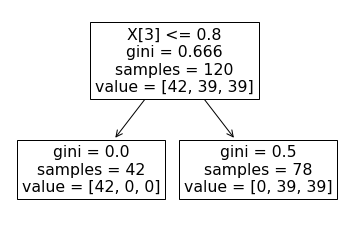

In [3]:
#Defining and fitting a decision tree instance
#DecisionTreeClassifier parameters are: min of 2 instances in leaves, no splits of subsets below 5, and a maximal tree depth
#from 1 to 5
classifier = tree.DecisionTreeClassifier(max_depth=1, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

#Setting up expectations and prediction
expected = y_test
predicted = classifier.predict(X_test)

#Show a visual representation of the tree
tree.plot_tree(classifier)

In [4]:
#Look at main classification metrics for tree of depth 1
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))

Expected:  [1 0 1 1 0 1 1 0 1 0 1 0 1 2 2 2 2 2 1 2 0 0 2 1 2 2 1 2 2 0]
Predicted: [1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.50      1.00      0.67        11
           2       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.50      0.67      0.56        30
weighted avg       0.45      0.63      0.51        30



C:\Users\dokur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[Text(133.92000000000002, 181.2, 'X[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [42, 39, 39]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.206\nsamples = 43\nvalue = [0, 38, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

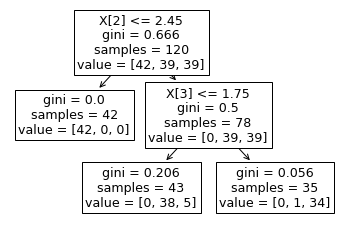

In [5]:
#For tree depth of 2
classifier = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

expected = y_test
predicted = classifier.predict(X_test)

tree.plot_tree(classifier)

In [6]:
#Look at main classification metrics for tree of depth 2
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))

Expected:  [1 0 1 1 0 1 1 0 1 0 1 0 1 2 2 2 2 2 1 2 0 0 2 1 2 2 1 2 2 0]
Predicted: [1 0 1 1 0 1 1 0 1 0 1 0 1 2 2 2 2 2 1 2 0 0 2 1 2 2 1 2 2 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [42, 39, 39]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.206\nsamples = 43\nvalue = [0, 38, 5]'),
 Text(41.85, 27.180000000000007, 'gini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(209.25, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

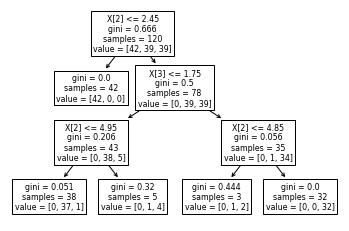

In [7]:
#For tree depth of 3
classifier = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

expected = y_test
predicted = classifier.predict(X_test)

tree.plot_tree(classifier)

In [8]:
#Look at main classification metrics for tree of depth 3
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))

Expected:  [1 0 1 1 0 1 1 0 1 0 1 0 1 2 2 2 2 2 1 2 0 0 2 1 2 2 1 2 2 0]
Predicted: [1 0 1 1 0 1 1 0 1 0 1 0 1 2 2 2 2 2 1 2 0 0 2 1 2 2 2 2 2 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



[Text(167.4, 195.696, 'X[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [42, 39, 39]'),
 Text(136.96363636363637, 152.208, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(197.83636363636364, 152.208, 'X[3] <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(121.74545454545455, 108.72, 'X[2] <= 4.95\ngini = 0.206\nsamples = 43\nvalue = [0, 38, 5]'),
 Text(60.872727272727275, 65.232, 'X[0] <= 4.95\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(30.436363636363637, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(91.30909090909091, 21.744, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(182.61818181818182, 65.232, 'X[1] <= 2.9\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(152.1818181818182, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(213.05454545454546, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(273.92727272727274, 108.72, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(243.4

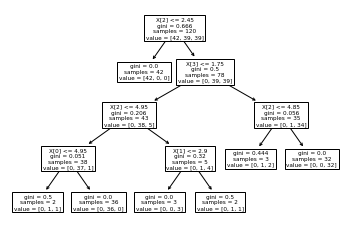

In [9]:
#For tree depth of 4
classifier = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

expected = y_test
predicted = classifier.predict(X_test)

tree.plot_tree(classifier)

In [10]:
#Look at main classification metrics for tree of depth 4
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))

Expected:  [1 0 1 1 0 1 1 0 1 0 1 0 1 2 2 2 2 2 1 2 0 0 2 1 2 2 1 2 2 0]
Predicted: [1 0 1 1 0 1 1 0 1 0 1 0 1 2 2 2 2 2 1 2 0 0 2 1 2 2 2 2 2 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



[Text(167.4, 195.696, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 39, 39]'),
 Text(136.96363636363637, 152.208, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(197.83636363636364, 152.208, 'X[3] <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(121.74545454545455, 108.72, 'X[2] <= 4.95\ngini = 0.206\nsamples = 43\nvalue = [0, 38, 5]'),
 Text(60.872727272727275, 65.232, 'X[0] <= 4.95\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(30.436363636363637, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(91.30909090909091, 21.744, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(182.61818181818182, 65.232, 'X[0] <= 6.5\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(152.1818181818182, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(213.05454545454546, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(273.92727272727274, 108.72, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(243.49

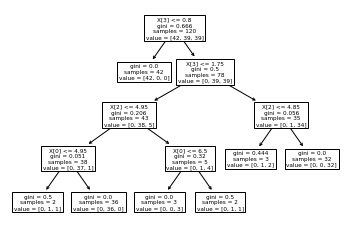

In [11]:
#For tree depth of 5
classifier = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

expected = y_test
predicted = classifier.predict(X_test)

tree.plot_tree(classifier)

In [12]:
#Look at main classification metrics for tree of depth 5
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))

Expected:  [1 0 1 1 0 1 1 0 1 0 1 0 1 2 2 2 2 2 1 2 0 0 2 1 2 2 1 2 2 0]
Predicted: [1 0 1 1 0 1 1 0 1 0 1 0 1 2 2 2 2 2 1 2 0 0 2 1 2 2 2 2 2 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Based on the above, the tree with the max-depth of 2 indicated the highest recall for all three classses (0:1, 1:1, 2:1). After max-depth of 3, the recall becomes constant among all three classes (0:1, 1:91, 2:1) meaning that the tree is a pure as it can possibly be based on the training set. That indicates that at max-depth of 2, the recall is the highest because it has not done enough splits within the tree to calculate the proper recall. Precision, on the other hand, is the lowest at max-depth of 1 because it has not predicted one of the classes (class 2). F1-score is based on both precision and recall, and since recall and precision were highest in the tre of max-depth of 2, it is also the highest in the tree of max-depth of 2.

From my understanding, macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. Weighted macro-average is similar to macro-average, but each metric is given an additional weight to further balance it out.

#### Problem 2 - Breast Cancer Dataset (Discrete)

In [91]:
#Create dataframe
bc_df = pd.read_csv("breast-cancer-wisconsin.data", names=['ID','Clump Thickness','Uniformity of Cell Size',
                                                           'Uniformity of Cell Shape','Marginal Adhesion',
                                                           'Simple Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
                                                           'Normal Nucleoli','Mitoses',
                                                           'Class (2 for benign, 4 for malignant)'], na_values=["?"])
bc_df = bc_df.drop(columns=['ID'])

#Replace missing values in dataframe with the mode
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(bc_df)
bc_df[bc_df.columns] = imputer.fit_transform(bc_df)
bc_df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Simple Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class (2 for benign, 4 for malignant)"
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4.0
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4.0


In [5]:
#Set-up data as samples and features
X = bc_df.drop('Class (2 for benign, 4 for malignant)', axis = 1)
y = bc_df['Class (2 for benign, 4 for malignant)']

#Using the train_test_split function to make a split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#For self, total = 569. X_train = 455/569 = 0.8 & X_test = 114/569 = 0.2
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(559, 9) (559,)
(140, 9) (140,)


[Text(167.4, 181.2, 'X[1] <= 3.5\ngini = 0.446\nsamples = 559\nvalue = [371, 188]'),
 Text(83.7, 108.72, 'X[5] <= 5.5\ngini = 0.138\nsamples = 390\nvalue = [361, 29]'),
 Text(41.85, 36.23999999999998, 'gini = 0.058\nsamples = 370\nvalue = [359, 11]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.18\nsamples = 20\nvalue = [2, 18]'),
 Text(251.10000000000002, 108.72, 'X[5] <= 1.5\ngini = 0.111\nsamples = 169\nvalue = [10, 159]'),
 Text(209.25, 36.23999999999998, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(292.95, 36.23999999999998, 'gini = 0.063\nsamples = 153\nvalue = [5, 148]')]

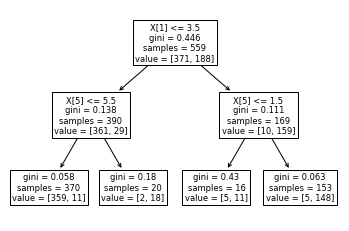

In [132]:
#Defining and fitting a decision tree instance
classifier = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5)
classifier = classifier.fit(X_train, y_train)

#Setting up expectations and prediction
expected = y_test
predicted = classifier.predict(X_test)

#Show a visual representation of the tree
tree.plot_tree(classifier)

In [133]:
#Create functions for the following
def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

In [137]:
#Calculate gini 
gini(169/559)

0.42184964845862627

In [138]:
#Calculate classification error
classification_error(169/559)

0.3023255813953488

In [139]:
#Calculate entropy before split
entropy(169/559)

0.8841151220488479

In [140]:
#Calculate avg entropy after split
(169/559)*entropy(153/169) + (390/559)*entropy(370/390)

0.3402100266069391

In [141]:
#Calculate information gain (Entropy before split - entropy after split)
0.8841151220488479 - 0.3402100266069391

0.5439050954419088

In [142]:
#Findout the feature of the first split
breastCancer.feature_names[1]

'mean texture'

From the above calculations, we can determine that:

* The gini of the first split is: 0.422

* The misclassification error of the first split is: 0.302

* The entropy of the first split is: 0.884

* The information gain of the first split is: 0.544

The feature that was selected for the first split is 'mean texture', which was determine throughout the training phase as the most valuable.

#### Problem 3 - Breast Cancer Dataset (Continous)

In [66]:
#Set up dataframe
bc_df_two = pd.read_csv("wdbc.data", names=['ID','Diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'])
bc_df_two = bc_df_two.drop(columns=['ID'])

#Store Diagnosis label & drop it for pca
diagnosis = bc_df_two['Diagnosis']
bc_df_two = bc_df_two.drop(columns=['Diagnosis'])
bc_df_two.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [67]:
#Create decision tree without conducting pca; Set up data as samples and features
X = bc_df_two
y = diagnosis

#Using the train_test_split function to make a split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#For self usage
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


[Text(167.4, 181.2, 'X[22] <= 115.35\ngini = 0.47\nsamples = 455\nvalue = [283, 172]'),
 Text(83.7, 108.72, 'X[27] <= 0.136\ngini = 0.189\nsamples = 312\nvalue = [279, 33]'),
 Text(41.85, 36.23999999999998, 'gini = 0.071\nsamples = 273\nvalue = [263, 10]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.484\nsamples = 39\nvalue = [16, 23]'),
 Text(251.10000000000002, 108.72, 'X[24] <= 0.1\ngini = 0.054\nsamples = 143\nvalue = [4, 139]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.028\nsamples = 141\nvalue = [2, 139]')]

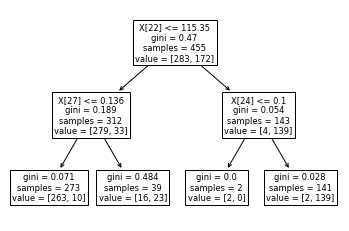

In [68]:
#Defining and fitting a decision tree instance; Same requirements as Problem 2
classifier = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5)
classifier = classifier.fit(X_train, y_train)

#Setting up expectations and prediction
expected = y_test
predicted = classifier.predict(X_test)

#Show a visual representation of the tree
tree.plot_tree(classifier)

In [69]:
#Look at main classification metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           B       0.96      0.95      0.95        74
           M       0.90      0.93      0.91        40

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [70]:
#Create confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(expected, predicted).ravel()
(tn, fp, fn, tp)

(70, 4, 3, 37)

In [71]:
#Creating pca with component 1
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
pca_bc_ds = pca.fit_transform(bc_df_two)
pca_bf = pd.DataFrame(data=pca_bc_ds, columns=['PCA1'])
pca_bf.head()

,PCA1
0,1160.142574
1,1269.122443
2,995.793889
3,-407.180803
4,930.341180


In [72]:
#Set-up data as samples and features
X = pca_bf
y = diagnosis

#Using the train_test_split function to make a split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#For self usage
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 1) (455,)
(114, 1) (114,)


[Text(167.4, 181.2, 'X[0] <= 54.079\ngini = 0.472\nsamples = 455\nvalue = [281, 174]'),
 Text(83.7, 108.72, 'X[0] <= -188.448\ngini = 0.209\nsamples = 312\nvalue = [275, 37]'),
 Text(41.85, 36.23999999999998, 'gini = 0.073\nsamples = 236\nvalue = [227, 9]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.465\nsamples = 76\nvalue = [48, 28]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 260.355\ngini = 0.08\nsamples = 143\nvalue = [6, 137]'),
 Text(209.25, 36.23999999999998, 'gini = 0.278\nsamples = 30\nvalue = [5, 25]'),
 Text(292.95, 36.23999999999998, 'gini = 0.018\nsamples = 113\nvalue = [1, 112]')]

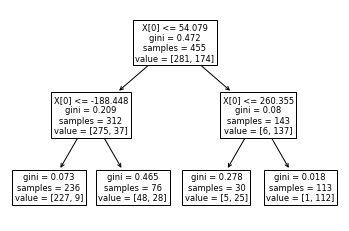

In [73]:
#Defining and fitting a decision tree instance
classifier = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5)
classifier = classifier.fit(X_train, y_train)

#Setting up expectations and prediction
expected = y_test
predicted = classifier.predict(X_test)

#Show a visual representation of the tree
tree.plot_tree(classifier)

In [74]:
#Look at main classification metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           B       0.91      0.99      0.95        76
           M       0.97      0.82      0.89        38

    accuracy                           0.93       114
   macro avg       0.94      0.90      0.92       114
weighted avg       0.93      0.93      0.93       114



In [75]:
#Create confusion matrix
tn, fp, fn, tp = confusion_matrix(expected, predicted).ravel()
(tn, fp, fn, tp)

(75, 1, 7, 31)

In [76]:
#Creating pca with component 2
pca_two = decomposition.PCA(n_components=2)
pca2_bc_ds = pca_two.fit_transform(bc_df_two)
pca2_bf = pd.DataFrame(data=pca2_bc_ds, columns=['PCA1', 'PCA2'])
pca2_bf.head()

,PCA1,PCA2
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743
3,-407.180803,-67.380320
4,930.341180,189.340742


In [77]:
#Set-up data as samples and features
X = pca2_bf
y = diagnosis

#Using the train_test_split function to make a split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#For self usage
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 2) (455,)
(114, 2) (114,)


[Text(167.4, 181.2, 'X[0] <= 41.653\ngini = 0.469\nsamples = 455\nvalue = [284, 171]'),
 Text(83.7, 108.72, 'X[1] <= -63.871\ngini = 0.199\nsamples = 313\nvalue = [278, 35]'),
 Text(41.85, 36.23999999999998, 'gini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.153\nsamples = 300\nvalue = [275, 25]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 68.814\ngini = 0.081\nsamples = 142\nvalue = [6, 136]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 102\nvalue = [0, 102]'),
 Text(292.95, 36.23999999999998, 'gini = 0.255\nsamples = 40\nvalue = [6, 34]')]

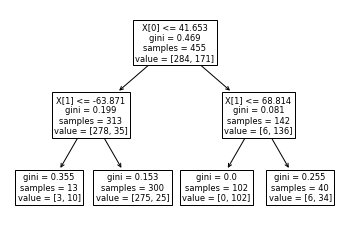

In [78]:
#Defining and fitting a decision tree instance
classifier = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5)
classifier = classifier.fit(X_train, y_train)

#Setting up expectations and prediction
expected = y_test
predicted = classifier.predict(X_test)

#Show a visual representation of the tree
tree.plot_tree(classifier)

In [79]:
#Look at main classification metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           B       0.92      0.93      0.93        73
           M       0.88      0.85      0.86        41

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



In [65]:
#Create confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(expected, predicted).ravel()
(tn, fp, fn, tp)

(81, 1, 7, 25)

To summarize the calculations above:

**Original data** produced the following in (B, M) format: 

    precision (0.96, 0.90), recall (0.95, 0.93), and F1-Score (0.95, 0.91). 
    
It's confusion matrix shows the following (tn, fp, fn, tp) format:
    
    (70, 4, 3, 37)

FPR (Fallout) = FP/(FP + TN) = 4/(4+70) = 4/74 = 0.0541

TPR (Recall) = TP/(TP + FN) = 37/(37+3) = 37/40 = 0.925

FPR/TPR = 0.058
    
**PCA with component of 1**: 

    precision (0.91, 0.97), recall (0.99, 0.82), and F1-Score (0.95, 0.89)
    
It's confusion matrix shows:

    (75, 1, 7, 31)
    
FPR (Fallout) = FP/(FP + TN) = 1/(1+75) = 1/75 = 0.013

TPR (Recall) = TP/(TP + FN) = 31/(31+7) = 31/38 = 0.816

FPR/TPR = 0.0163
    
**PCA with component of 2**:

    precision (0.92, 0.88), recall (0.93, 0.85) and F1-Score (0.93, 0.86)

It's confusion matrix shows:

    (81, 1, 7, 25)
    
FPR (Fallout) = FP/(FP + TN) = 1/(1+81) = 1/82 = 0.0122

TPR (Recall) = TP/(TP + FN) = 25/(25+7) = 25/32 = 0.781

FPR/TPR = 0.0156
    


#### Problem 4 - Using Numpy Random to Generate Mockups for Decision Trees

In [77]:
#Setting up random mean and deviation
N = 1000
u1 = 5
s1 = 2

x1 = np.random.normal(u1,s1,N)
c1 = np.repeat('c1',N)
df1 = df1 = pd.DataFrame(dict(zip(['x1','c'],[x1,c1])))

In [78]:
df1.head()

,x1,c
0,3.664234,c1
1,4.202517,c1
2,2.258446,c1
3,3.032254,c1
4,0.533983,c1


In [79]:
#Setting up random mean and deviation
N = 1000
u2 = -5
s2 = 2

x2 = np.random.normal(u2,s2,N)
df2 = pd.DataFrame(dict(zip(['x2','c'],[x2,c1])))

In [80]:
df2.head()

,x2,c
0,-8.568411,c1
1,-3.781455,c1
2,-3.360326,c1
3,-5.540121,c1
4,-6.454511,c1


In [81]:
#Add x2 from df2 to df1
df1['x2'] = df2['x2']

In [82]:
#Drop the 'c' column
df1 = df1.drop(columns=['c'])
df1

,x1,x2
0,3.664234,-8.568411
1,4.202517,-3.781455
2,2.258446,-3.360326
3,3.032254,-5.540121
4,0.533983,-6.454511
...,...,...
995,6.005754,-3.708700
996,4.258397,-4.005199
997,3.478853,-8.073731
998,2.006145,-4.457601


In [88]:
#Generate a random label of 0 and 1
import random
randomLabel = []
for i in range(0,1000):
    n = random.randint(0, 1)
    randomLabel.append(n)

#Add that label to df1
df1['Label'] = randomLabel
df1

,x1,x2,Label
0,3.664234,-8.568411,0
1,4.202517,-3.781455,0
2,2.258446,-3.360326,1
3,3.032254,-5.540121,1
4,0.533983,-6.454511,1
...,...,...,...
995,6.005754,-3.708700,1
996,4.258397,-4.005199,0
997,3.478853,-8.073731,0
998,2.006145,-4.457601,1


In [86]:
df1.describe()

,x1,x2,Label
count,1000.000000,1000.000000,1000.000000
mean,4.979629,-5.054256,0.519000
std,1.988367,1.932585,0.499889
min,-0.683081,-12.605303,0.000000
25%,3.647374,-6.310515,0.000000
50%,5.079126,-5.027023,1.000000
75%,6.268326,-3.701221,1.000000
max,11.581170,2.439067,1.000000


In [84]:
#Set-up data as samples and features
X = df1.drop('Label', axis = 1)
y = df1['Label']

#Using the train_test_split function to make a split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#For self, total = 569. X_train = 455/569 = 0.8 & X_test = 114/569 = 0.2
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


[Text(167.4, 181.2, 'X[1] <= -9.082\ngini = 0.499\nsamples = 800\nvalue = [380, 420]'),
 Text(83.7, 108.72, 'X[0] <= 0.697\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(251.10000000000002, 108.72, 'X[1] <= -0.868\ngini = 0.498\nsamples = 787\nvalue = [370, 417]'),
 Text(209.25, 36.23999999999998, 'gini = 0.498\nsamples = 775\nvalue = [361, 414]'),
 Text(292.95, 36.23999999999998, 'gini = 0.375\nsamples = 12\nvalue = [9, 3]')]

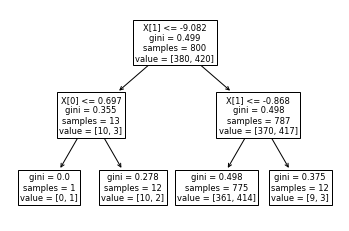

In [85]:
#Defining and fitting a decision tree instance
classifier = tree.DecisionTreeClassifier(max_depth=2)
classifier = classifier.fit(X_train, y_train)

#Setting up expectations and prediction
expected = y_test
predicted = classifier.predict(X_test)

#Show a visual representation of the tree
tree.plot_tree(classifier)

In [89]:
#Calculate the empirical distribution
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(x2)
ecdf(-9.082)

0.016

The empirical distribution for the above descision tree is 1.6%. The threshold above split in a manner that 787/800 of the samples split to the right and less than 10% split to the left. This follows par with the emprical distriubtion. 